In [69]:
pip install python-binance

Note: you may need to restart the kernel to use updated packages.


In [36]:
import yfinance as yf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

In [37]:
tik = ['BTC-USD']

In [38]:
df = yf.download(tickers= tik, start= '2019-01-01', end='2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [39]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824
...,...,...,...,...,...,...
2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,21365673026
2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,22445257702
2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,22874131672


<AxesSubplot:xlabel='Date'>

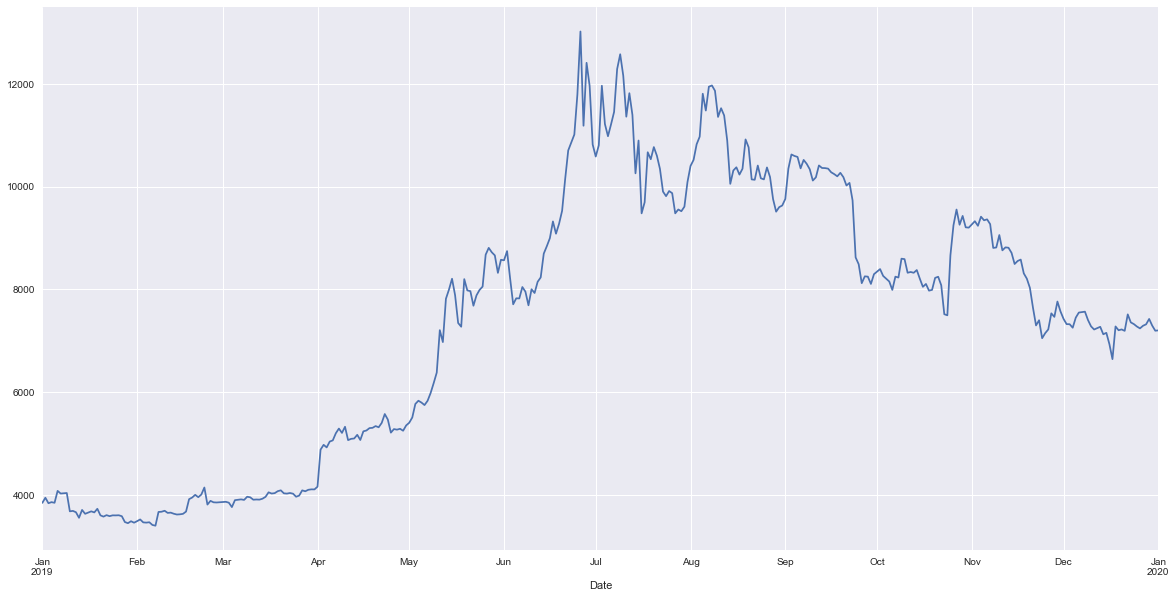

In [40]:
df['Close'].plot(figsize = (20,10))

In [41]:
df['log_re'] = np.log(df.Close/ df.Close.shift())
df['simp_re'] = df.Close.pct_change()

<AxesSubplot:xlabel='Date'>

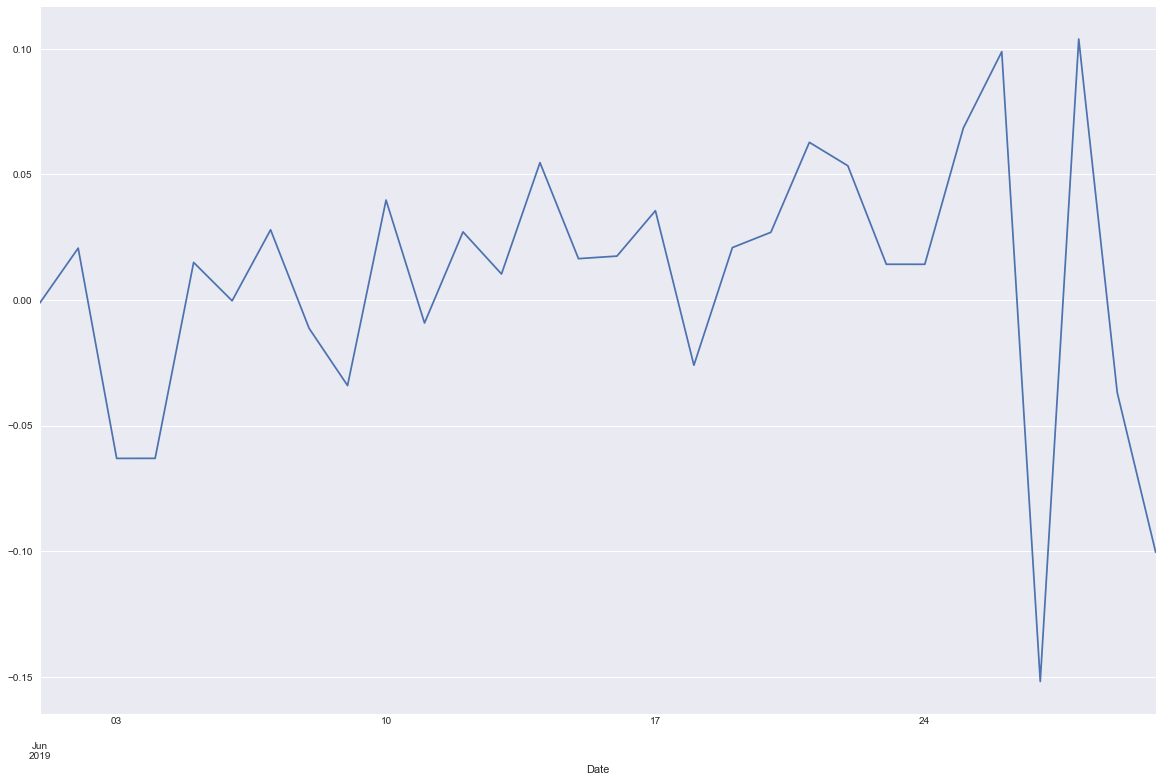

In [42]:
df.loc['2019-06','log_re'].plot(figsize=(20,13))

<AxesSubplot:xlabel='Date'>

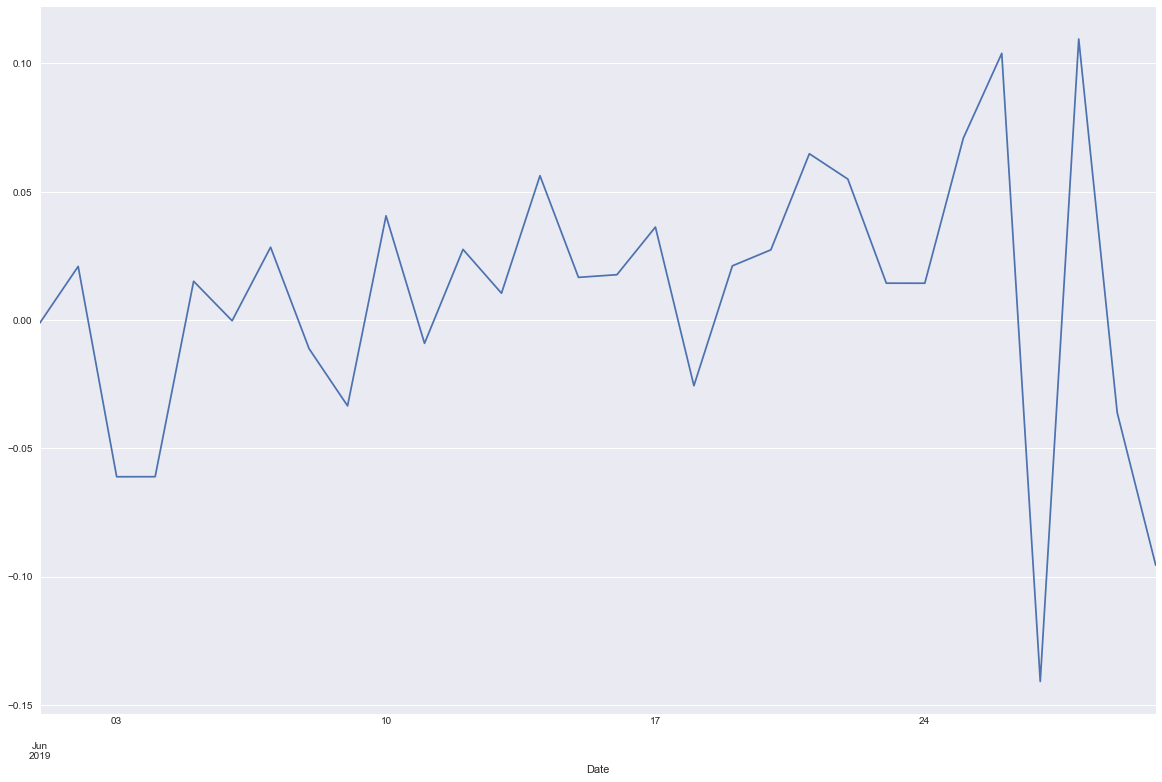

In [43]:
df.loc['2019-06','simp_re'].plot(figsize=(20,13))

In [44]:
df.log_re.mean()

0.001719771555822806

In [45]:
df.log_re.std()

0.035306141495823624

Text(0.5, 1.0, 'Daily Returns Distribution')

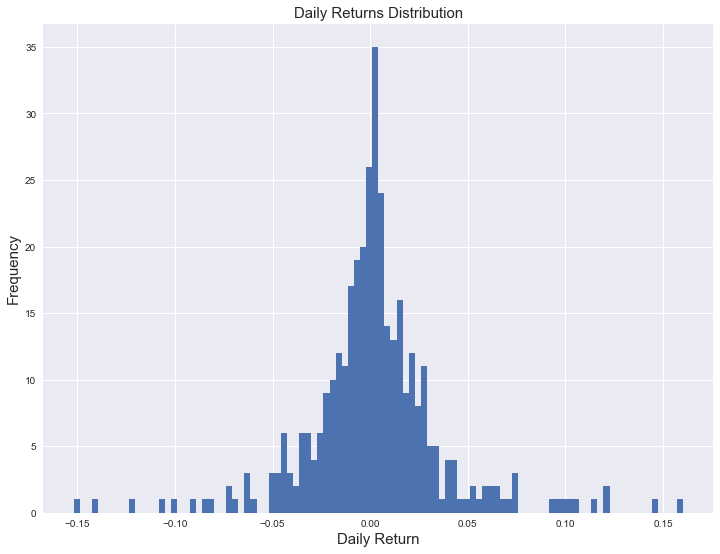

In [46]:
df.log_re.plot(kind='hist', bins= 100, density = False, figsize = (12,9))
plt.xlabel('Daily Return', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Daily Returns Distribution', fontsize= 15)

In [47]:
mu = df.log_re.mean()
mu

0.001719771555822806

In [48]:
std = df.log_re.std()
std

0.035306141495823624

In [49]:
import scipy.stats as stats

In [50]:
stats.skew(df.log_re.dropna())

0.23108065991019444

In [51]:
stats.kurtosis(df.log_re.dropna(), fisher= True)

4.413221492313258

In [52]:
x = np.linspace(df.log_re.min(), df.log_re.max(), 10000)
x

array([-0.15181967, -0.15178848, -0.1517573 , ...,  0.1599796 ,
        0.16001079,  0.16004198])

In [53]:
y = stats.norm.pdf(x, loc = mu, scale = std)
y

array([0.0008838 , 0.0008872 , 0.00089061, ..., 0.00048973, 0.0004878 ,
       0.00048587])

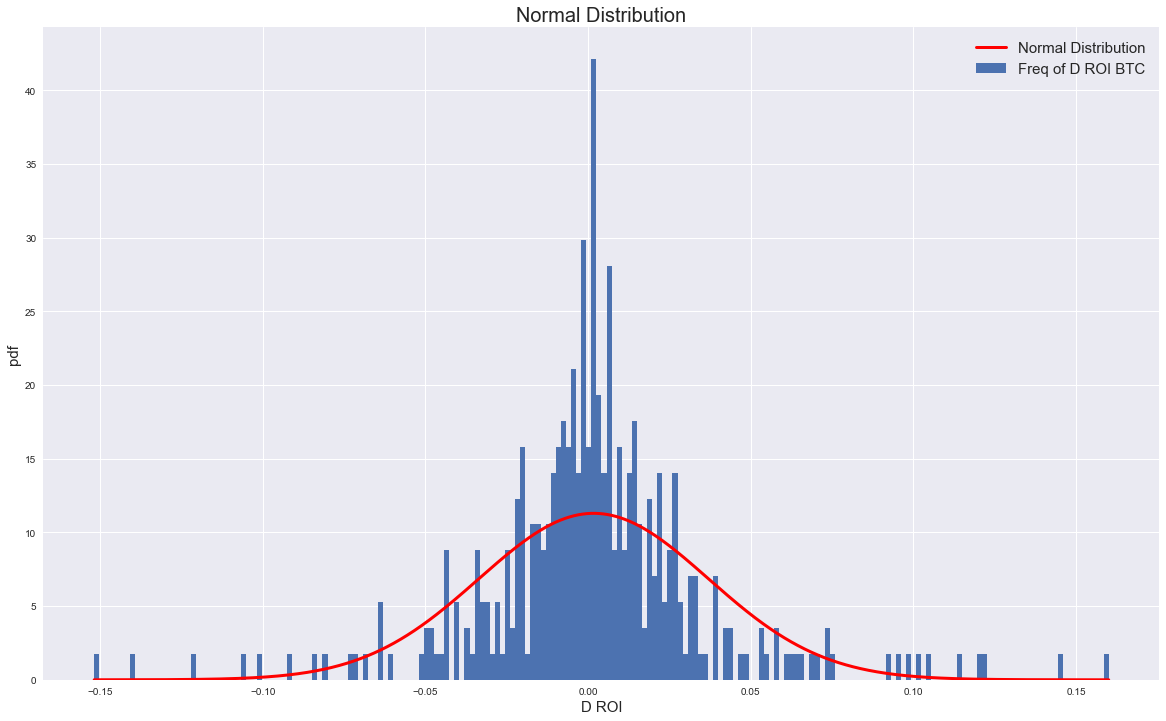

In [54]:
plt.figure(figsize=(20,12))
plt.hist(df.log_re, bins = 200, density= True, label= 'Freq of D ROI BTC')
plt.plot(x, y, linewidth = 3, color = 'red', label = 'Normal Distribution')
plt.title('Normal Distribution', fontsize = 20)
plt.xlabel('D ROI', fontsize= 15)
plt.ylabel('pdf', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [55]:
z_stat, p_value = stats.normaltest(df.log_re.dropna())

In [56]:
z_stat

46.687907469046706

In [57]:
p_value

7.275279913582246e-11

In [58]:
round(p_value, 10)

1e-10

<AxesSubplot:xlabel='Date'>

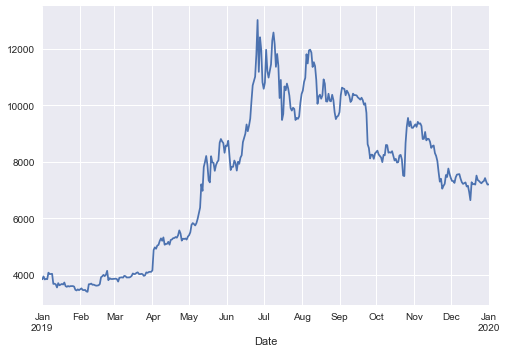

In [60]:
df.Close.plot()

In [67]:
monthly = df.Close.resample('W').last()
monthly

Date
2019-01-06     4076.632568
2019-01-13     3552.953125
2019-01-20     3601.013672
2019-01-27     3583.965820
2019-02-03     3464.013428
2019-02-10     3690.188232
2019-02-17     3673.836182
2019-02-24     3810.427490
2019-03-03     3847.175781
2019-03-10     3951.599854
2019-03-17     4025.229004
2019-03-24     4022.168213
2019-03-31     4105.404297
2019-04-07     5198.896973
2019-04-14     5167.722168
2019-04-21     5314.531250
2019-04-28     5285.139160
2019-05-05     5795.708496
2019-05-12     6972.371582
2019-05-19     8197.689453
2019-05-26     8673.215820
2019-06-02     8742.958008
2019-06-09     7688.077148
2019-06-16     8994.488281
2019-06-23    10855.371094
2019-06-30    10817.155273
2019-07-07    11450.846680
2019-07-14    10256.058594
2019-07-21    10599.105469
2019-07-28     9552.860352
2019-08-04    10970.184570
2019-08-11    11523.579102
2019-08-18    10345.810547
2019-08-25    10138.517578
2019-09-01     9757.970703
2019-09-08    10441.276367
2019-09-15    10347.712

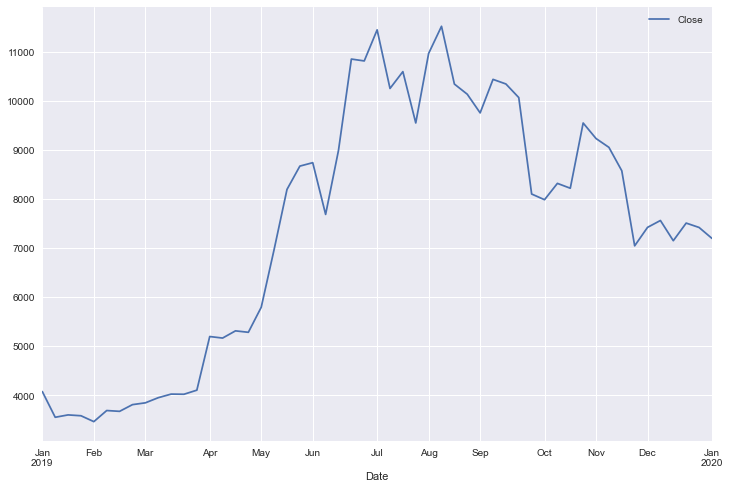

In [68]:
monthly.plot(figsize = (12, 8))
plt.legend()